# 概要
データセットを(時間-頻度)のヒストグラムに置いて比較する．  
まず，月によって分布が異なる仮説を置く．

特定の月とそうでない月でそれぞれヒストグラムを計算し，正規化して比較する．  

## データプロット
`key_info_20181102.csv`を使用

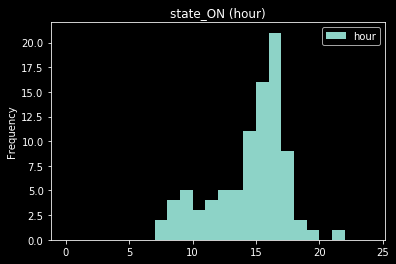

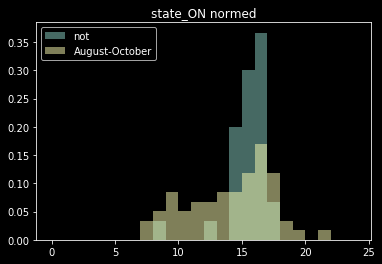

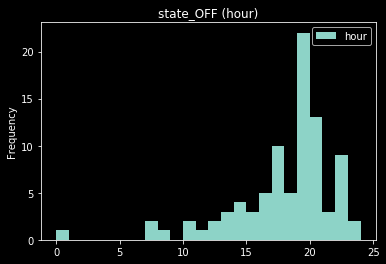

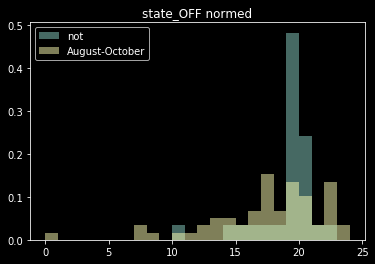

                           key_info_id  is_anomal   time  hour  month  \
dtime                                                                   
2018-07-03 21:28:00+09:00          145          0  77280    21      7   
2018-08-21 21:07:17+09:00          225          1  76037    21      8   
2018-08-22 22:09:36+09:00          229          1  79776    22      8   
2018-10-09 21:01:34+09:00          282          0  75694    21     10   
2018-10-10 22:00:00+09:00          288          0  79200    22     10   
2018-10-16 22:25:24+09:00          322          1  80724    22     10   
2018-10-17 22:29:00+09:00          324          1  80940    22     10   
2018-10-19 22:06:36+09:00          334          1  79596    22     10   
2018-10-23 22:28:02+09:00          338          1  80882    22     10   
2018-10-26 22:27:47+09:00          344          1  80867    22     10   
2018-10-29 22:36:38+09:00          346          1  81398    22     10   
2018-10-30 23:31:09+09:00          348          0  

In [18]:
# coding: utf-8
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

def plot_datasets(datasets_path: str):
    # load datasets with pd
    df = pd.read_csv(datasets_path)
    
    # rename time to dtime
    df.rename(columns={'time': 'dtime'}, inplace=True)
    
    # convert dtime string to dtime format, and set to index
    df['dtime'] = pd.to_datetime(df['dtime'])
    df.set_index('dtime', inplace=True)
    
    # convert timezone to Asia/Tokyo
    df.index = df.index.tz_localize('UTC').tz_convert('Asia/Tokyo')
    
    # create time, hour, month column
    df['time'] = list(pd.Series(df.index).apply(lambda x: ((x.hour * 60 + x.minute) * 60 + x.second)))
    df['hour'] = list(pd.Series(df.index).apply(lambda x: x.hour))
    df['month'] = list(pd.Series(df.index).apply(lambda x: x.month))
    
    # convert state to int
    dummy_df = pd.get_dummies(df, columns=['state'])

    # plot hist if status is on
    dummy_df.query('state_ON == 1').plot(kind='hist', y='hour', bins=24, title='state_ON (hour)', range=(0, 24))
    on_part_august = dummy_df.query('state_ON == 1 and (month >= 8 and 10 >= month)')[["hour"]].values
    on_part_not = dummy_df.query('state_ON == 1 and (month < 8 or month > 10)')[["hour"]].values
    
    plt.figure()
    plt.hist(on_part_not[:, 0], label="not", bins=24, alpha=0.5, normed=1, range=(0, 24))
    plt.hist(on_part_august[:, 0], label="August-October", bins=24, alpha=0.5, normed=1, range=(0, 24))
    plt.title("state_ON normed")
    plt.legend()
    plt.show()
    
    # plot hist if status is off
    dummy_df.query('state_OFF == 1').plot(kind='hist', y='hour', bins=24, title='state_OFF (hour)', range=(0, 24))

    off_part_august = dummy_df.query('state_OFF == 1 and (month >= 8 and 10 >= month)')[["hour"]].values
    off_part_not = dummy_df.query('state_OFF == 1 and (month < 8 or month > 10)')[["hour"]].values
    
    plt.figure()
    plt.hist(off_part_not[:, 0], label="not", bins=24, alpha=0.5, normed=1, range=(0, 24))
    plt.hist(off_part_august[:, 0], label="August-October", bins=24, alpha=0.5, normed=1, range=(0, 24))
    plt.title("state_OFF normed")
    plt.legend()
    plt.show()

    # check overtime
    print(dummy_df.query("state_OFF == 1 and hour > 20"))
    
def main():
    # params
    datasets_path = "./key_info_20181102_anomaly.csv"
    
    # change plt style
    plt.style.use('dark_background')

    plot_datasets(datasets_path)
    
if __name__ == "__main__":
    main()

# 考察
残業が多いのは8-10月にかけてと言える．これは，ヒストグラムとデータ抽出結果からわかる．  
8-10月にかけての分布は軒並み分散が大きくなっていると言える．  
よって，ガウス分布などを元にする外れ値の検出が有効かもしれない．  
アノーマルデータと突き合わせるとまた違った結論が出るだろう．